<a href="https://colab.research.google.com/github/enoch-baffoe/Sentiment-Analysis-using-BERT/blob/main/IMDB_sentiment_analysis_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - IMDB Dataset

In [1]:
!pip install transformers[sentencepiece] datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 7.9 MB/s 
     |████████████████████████████████| 432 kB 68.4 MB/s 
     |████████████████████████████████| 212 kB 73.0 MB/s 
     |████████████████████████████████| 163 kB 60.2 MB/s 
     |████████████████████████████████| 115 kB 72.3 MB/s 
     |████████████████████████████████| 127 kB 71.0 MB/s 
     |████████████████████████████████| 6.6 MB 50.4 MB/s 
     |████████████████████████████████| 1.3 MB 65.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## Datasets library

In [21]:
from datasets import list_datasets
# check list of available datasets
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookcorpusopen'

In [32]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [33]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [34]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

The dataset is huge and training it all will take a lot of time. Also there is no `validation data` in the dataset. As a result, I will split get a smaller randomly shuffle and select 2000 rows and then split them into training and validation data.

In [35]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [36]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [37]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [38]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

I then replace the training dataset with the smaller one and add a validation data set to the `imdb` dataset.

In [39]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

Here, I reduce the test dataset to 400

In [40]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [41]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [42]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [44]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"This was a movie i could not wait to see! So i finally got it and I was pretty disappointed. For starters,the movie has so little said about New York,just a bunch of confusing shots of buildings,streets,bridges and cafes.It really doesn't stay fo...",0
1284,"i saw this movie at the toronto film festival with fairly solid expectations. the movie has a great cast and was closing at the festival so it must be good, right? how wrong i was. <br /><br />i knew we were in trouble when before the film the di...",0
408,"Fever Pitch has many of the clichés we have come to identify with Hollywood romantic comedies: a relationship between two people with little in common, the secret he's been hiding that she discovers, the inevitable breakup, and the very public  ...",1
1282,"Three girls, the youngest descendents of the Gaylord family, one of America's most royal families, are orphaned at a young age. Right before he goes off to France to fight in WWI, their father tells the oldest, Fiona, never to sell the land. By t...",1
1447,"Fred Gwynne, Al Lewis, Sid Caesar, and Yvonne De Carlo star in this funny, funny movie. The late Fred Gwynne is truly wonderful as Herman Munster who lives with Grandpa Munster (Al Lewis), wife Lily (Yvonne De Carlo), and his son and daughter. Si...",1
1144,"""My child, my sister, dream <br /><br />How sweet all things would seem <br /><br />Were we in that kind land to live together, <br /><br />And there love slow and long, <br /><br />There love and die among <br /><br />Those scenes that image you...",1
1381,"This film is absolutely stunning. A new Blade Runner - future noir at it's most gritty. The vision of Paris is superb, both recognisable and visionary, with sweeping vistas, grungy set pieces and futuristic virtual reality.<br /><br />The story l...",1
181,"Part of the enjoyment that I took from this film stemmed from the fact that I knew nothing more about it than that it starred John Turturro and Emily Watson (2 reasons enough to watch), was a period piece and involved chess. Everything that evolv...",1
1183,"i just happened to stumble on this film channel surfing. my first reaction was, 'oh god not again!'. it's so hip to play a retard these days it has become pretentious and frankly despicable. for some reason, though, i stayed and watched it 'til t...",0
1103,"A story of amazing disinterest kills ""The Psychic"" over and over again. The characters and plot are completely uninteresting (as is Fulci's mad camera work, which is usually a redeeming factor in his films), and any grasp of suspense is nowhere t...",0


In [45]:
df.loc[0, 'text']

"Michael Cacoyannis has had a relatively long career but has surprisingly few credits to his name, including some real duds such as the unfunny cold war satire The Day the Fish Came Out. Iphigenia, however, is a highlight. Adapted by Cacoyannis from the play by Euripides, it's a superior rendering of the classic tragedy and recently made its first television appearance in many years in the United States courtesy the Flix Channel. The film is shot on an epic scale but is decidedly not a 'big' film, with the emphasis placed on the simple story: in supplication to the gods, King Agamemnon (Kostas Kazakos)is compelled to sacrifice his daughter Iphigenia (Tatiana Papamoschou), much to the consternation of Queen Clytemnastrae (Irene Papas). Kazakos and Papas are both outstanding, but it is the stunning Papamoschou who brings the most interesting elements to the screen, blending the innocence of childhood with the dawning realization that she is the pawn in a political game. Strongly recommen

In [46]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

"Michael Cacoyannis has had a relatively long career but has surprisingly few credits to his name, including some real duds such as the unfunny cold war satire The Day the Fish Came Out. Iphigenia, however, is a highlight. Adapted by Cacoyannis from the play by Euripides, it's a superior rendering of the classic tragedy and recently made its first television appearance in many years in the United States courtesy the Flix Channel. The film is shot on an epic scale but is decidedly not a 'big' film, with the emphasis placed on the simple story: in supplication to the gods, King Agamemnon (Kostas Kazakos)is compelled to sacrifice his daughter Iphigenia (Tatiana Papamoschou), much to the consternation of Queen Clytemnastrae (Irene Papas). Kazakos and Papas are both outstanding, but it is the stunning Papamoschou who brings the most interesting elements to the screen, blending the innocence of childhood with the dawning realization that she is the pawn in a political game. Strongly recommen

In [47]:
df.label.value_counts()

1    802
0    798
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


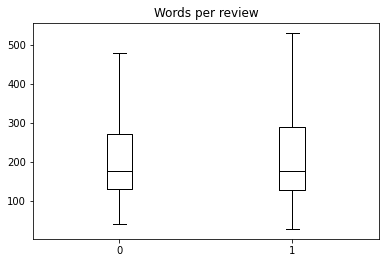

In [48]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
262,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38
406,A movie best summed up by the scene where a victim simulates disembowelment by pulling some poor animal's intestines out from under her T-shirt. Too terrible for words.,0,28
455,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27
536,"Before Dogma 95: when Lars used movies as art, not just a story. A beautiful painting about love and death. This is one of my favorite movies of all time. The color... The music... Just perfect.",1,36
989,Allison Dean's performance is what stands out in my mind watching this film. She balances out the melancholy tone of the film with an iridescent energy. I would like to see more of her.,1,34
1309,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
1340,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34


In [50]:
imdb.reset_format()

## Tokenizer

In [76]:
from transformers import AutoTokenizer

#checkpoint = "distilbert-base-cased"
checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [77]:
print(imdb_encoded['train'][0])

{'text': "Michael Cacoyannis has had a relatively long career but has surprisingly few credits to his name, including some real duds such as the unfunny cold war satire The Day the Fish Came Out. Iphigenia, however, is a highlight. Adapted by Cacoyannis from the play by Euripides, it's a superior rendering of the classic tragedy and recently made its first television appearance in many years in the United States courtesy the Flix Channel. The film is shot on an epic scale but is decidedly not a 'big' film, with the emphasis placed on the simple story: in supplication to the gods, King Agamemnon (Kostas Kazakos)is compelled to sacrifice his daughter Iphigenia (Tatiana Papamoschou), much to the consternation of Queen Clytemnastrae (Irene Papas). Kazakos and Papas are both outstanding, but it is the stunning Papamoschou who brings the most interesting elements to the screen, blending the innocence of childhood with the dawning realization that she is the pawn in a political game. Strongly

## Tiny IMDB

In [78]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTokenClassification',
 'AutoModelForVideoClassification',
 'AutoModelForVision2Seq',
 'AutoModelForVisualQuestionAnswering',
 'AutoModelWithLMHead']

In [79]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Now to train and Test to see if the model would work, we train a very little sample of the data first. If it gives the desirable results then I train the rest.

In [80]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [81]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
include_inputs_for_metrics=False,
jit_mode_eval=False,
label_n

In [82]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.684300,0.702752
2,0.671100,0.717955


In [83]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-0.01756205, -0.37852103],
       [-0.0375828 , -0.25608933],
       [ 0.00143439, -0.41321626],
       [-0.01696673, -0.33464798],
       [-0.08094244, -0.33010235],
       [ 0.00770917, -0.31882876],
       [ 0.01286669, -0.379647  ],
       [-0.01421335, -0.36377135],
       [ 0.02318726, -0.34835342],
       [ 0.02166968, -0.34380963]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.6497212648391724, 'test_runtime': 0.3946, 'test_samples_per_second': 25.34, 'test_steps_per_second': 5.068})

In [84]:
preds.predictions.shape

(10, 2)

In [85]:
preds.predictions.argmax(axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

Now we add an accuracy score to the model output.

In [87]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.7

In [88]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [89]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.637200,0.723602,0.300000
2,0.591400,0.757681,0.500000


## Training run

In [90]:
batch_size = 8
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [91]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.434100,0.417955,0.850000
2,0.178100,0.494497,0.875000


In [92]:


trainer.evaluate()

{'eval_loss': 0.4944974184036255,
 'eval_accuracy': 0.875,
 'eval_runtime': 14.3164,
 'eval_samples_per_second': 27.94,
 'eval_steps_per_second': 3.492,
 'epoch': 2.0}

In [94]:
trainer.save_model()

In [95]:
model_name

'bert-base-cased-finetuned-imdb'

In [97]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('The movie was bad. It started out great but got worse as it continued')

[{'label': 'LABEL_0', 'score': 0.9833655953407288}]

In [98]:
classifier('The plot was not good but the actors did a great job')

[{'label': 'LABEL_1', 'score': 0.8153467178344727}]